<a href="https://colab.research.google.com/github/garenoo/2023MLProgramming/blob/main/5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine_csv_data')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
# 타깃에 있는것들 모두 출력, 0이면 레드와인, 1이면 화이트와인
print(pd.unique(wine['class']))

[0. 1.]


In [ ]:
wine.info()
# 누락값이 있다면 제거하거나 평균값을 넣을 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy() # 데이터프레임을 넘파이 배열로 바꾸겠다
target = wine['class'].to_numpy()
print(list(target).count(0))
print(list(target).count(1))

1599
4898


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, stratify = target, random_state=42)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


Text(0, 0.5, 'Frequency')

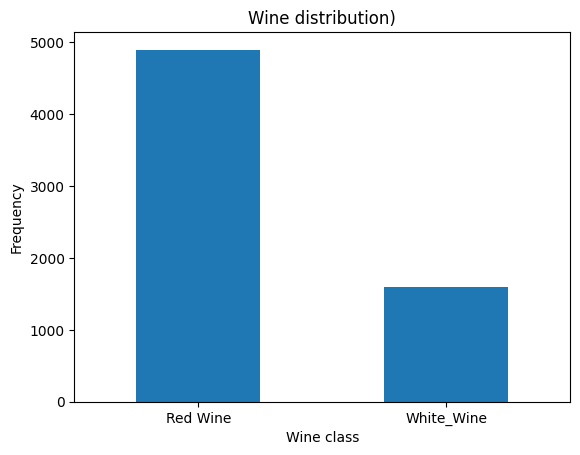

In [ ]:
LABELS = ["Red Wine", "White_Wine"]

import matplotlib.pyplot as plt
count_classes = pd.value_counts(wine["class"], sort =True)
count_classes.plot(kind='bar', rot =0)
plt.title("Wine distribution)")
plt.xticks(range(2), LABELS)
plt.xlabel("Wine class")
plt.ylabel("Frequency")

In [ ]:
# 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

# 과대적합, 과소적합이 있는지 확인하기 위해
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7829517029055224
0.7761538461538462


In [ ]:
# 설명하기 어려운 모델
  # 알콜 도수와 당도가 높을 수록 화이트와인일 가능성이 높고, pH가 높을수록 레드와인일 가능성이 높을거라 측정
  # 이 숫자가 뭘 의미하는지 모르고, 다항 특성을 추가하면 더 어려워짐
print(lr.coef_, lr.intercept_)

[[ 0.56730858  1.65325259 -0.71278722]] [1.78577187]


In [ ]:
# 결정트리는 학습 결과를 설명하기 쉬움, 약간의 무작위성이 있음

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

# 과대적합
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9978833942659227
0.8646153846153846


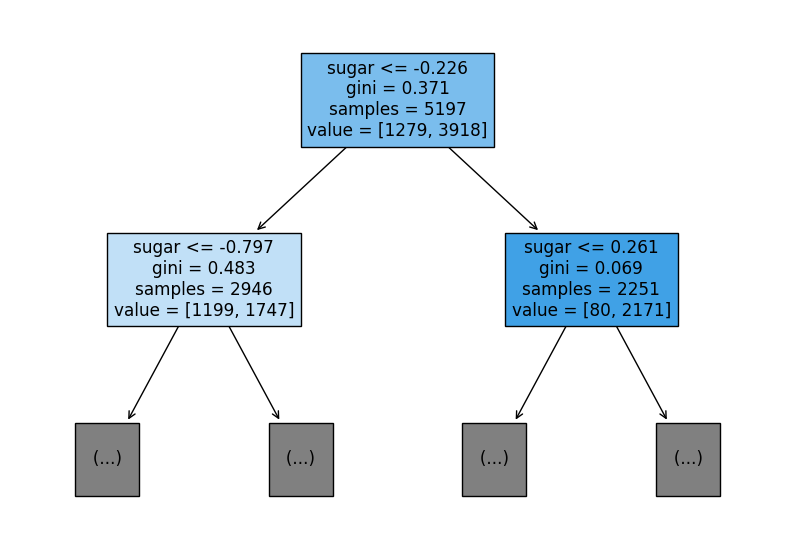

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# value[음성, 양성] 양성이 크면 파란색, 음성이 크면 주황색
# samples 총 샘플의 수

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8458726188185491
0.8407692307692308


In [ ]:
# 분류나무 분할법칙
  # 분할 변수와 분할점(상자 안에 변수와 숫자)은 클래스의 분포를 가장 잘 구별해주는 쪽으로 정함
  # 클래스의 분포를 잘 구별해주는 측도로 순수도 또는 불순도를 정의
  # 각 노드에서 분할변수와 분할점의 설정은 불순도의 감소가 최대(정보이득이 최대)

# 불순도
  # gini 불순도 = 1 - ((음성클래스비율)^2 + (양성클래스비율)^2)
   # 0이 될수록 좋음
  # 엔트로피 불순도

# 정보 이득
  # 부모 노드와 자식 노드의 불순도 차이


In [ ]:
# 규제 방법 - 가지치기 1
  # max_depth
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8458726188185491
0.8407692307692308


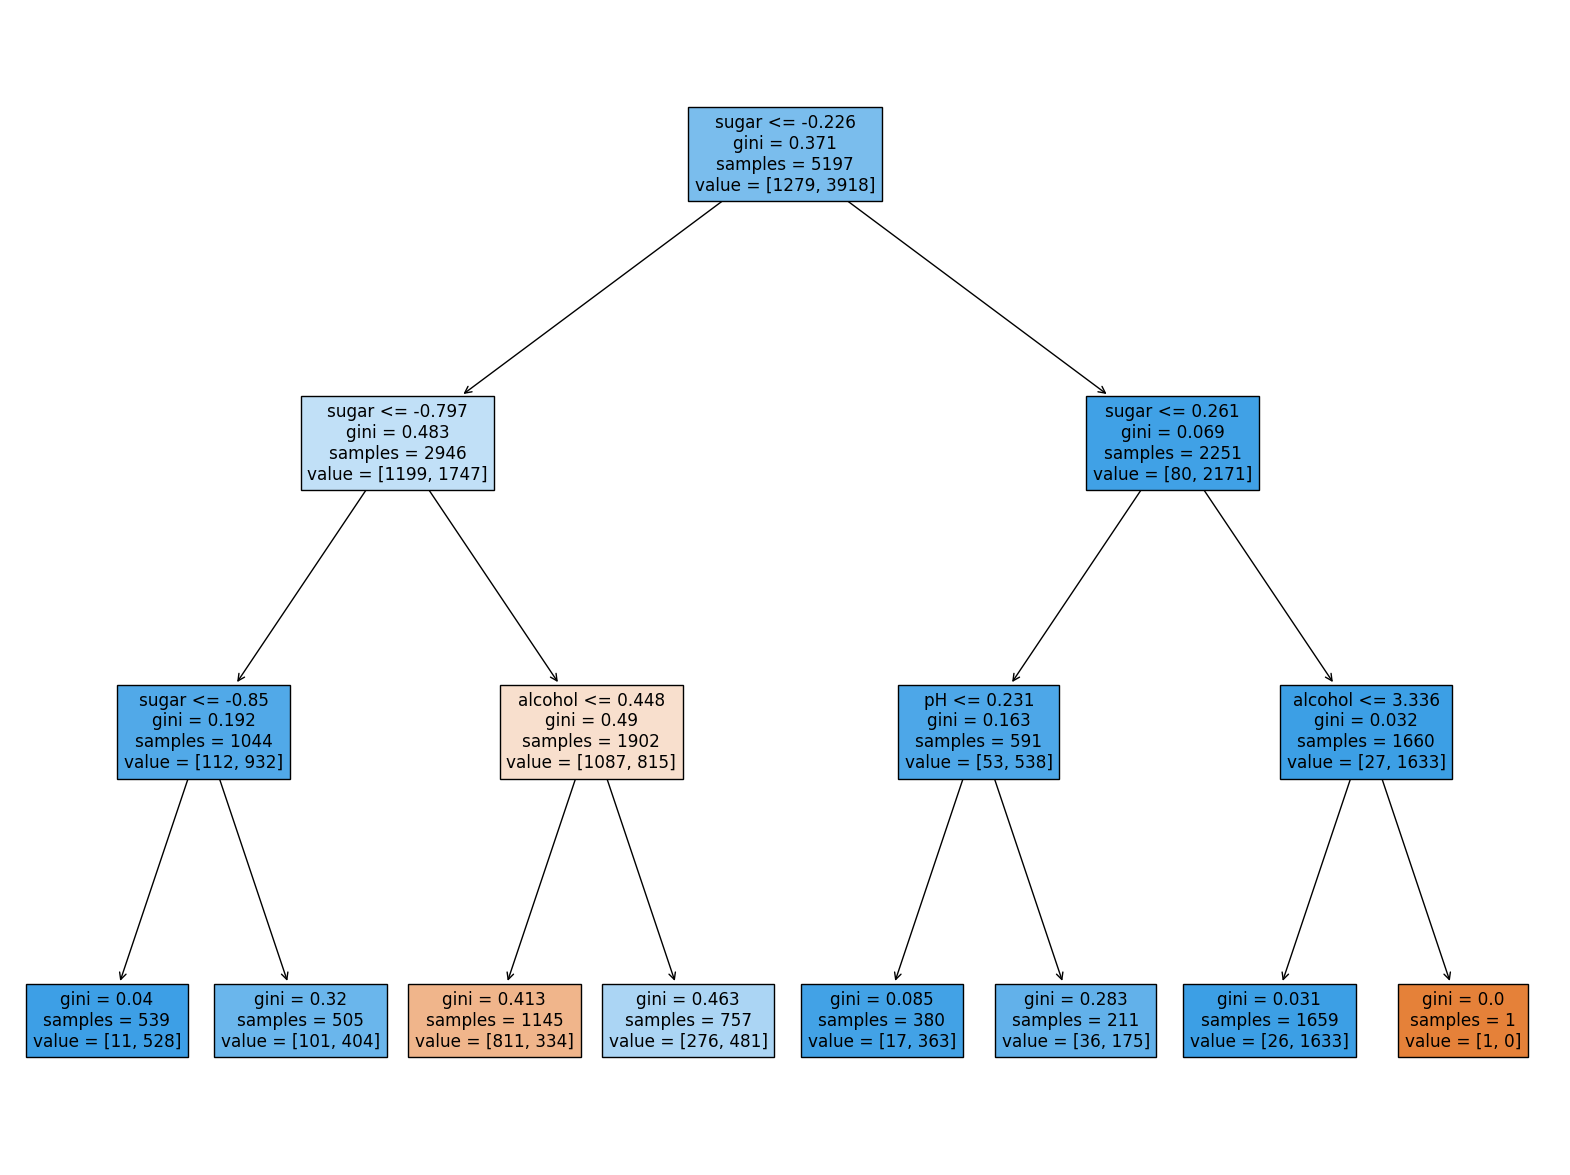

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 특성 중요도
  # 어떤 특성이 가장 유용한지 나타내는 지표
print(dt.feature_importances_)

[0.14086835 0.85360568 0.00552597]


In [ ]:
# 당도만 사용해서 훈련

data_e = wine['sugar'].to_numpy() # 데이터프레임을 넘파이 배열로 바꾸겠다
target_e = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split

train_input_e, test_input_e, train_target_e, test_target_e = train_test_split(
    data_e, target_e, test_size=0.2, stratify = target_e, random_state=42)
print(train_input_e.shape, test_input_e.shape)
print(list(target_e).count(0))
print(list(target_e).count(1))

(5197,) (1300,)
1599
4898


In [ ]:
# 가지치기 2 -불순도 사용

In [ ]:
# 결정트리 장점
  # 표준화 전처리가 필요없음
  # 특성 중요도 계산 가능
# 단점
  # 적은 개수의 노이즈에도 큰 영향